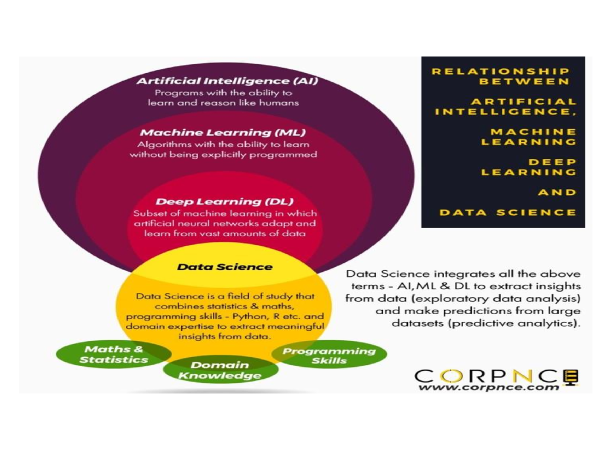

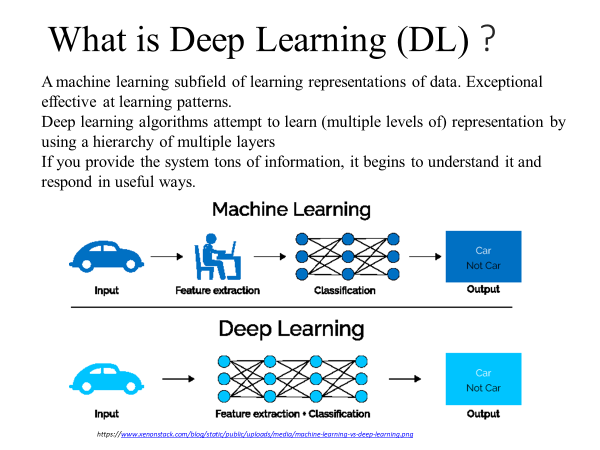

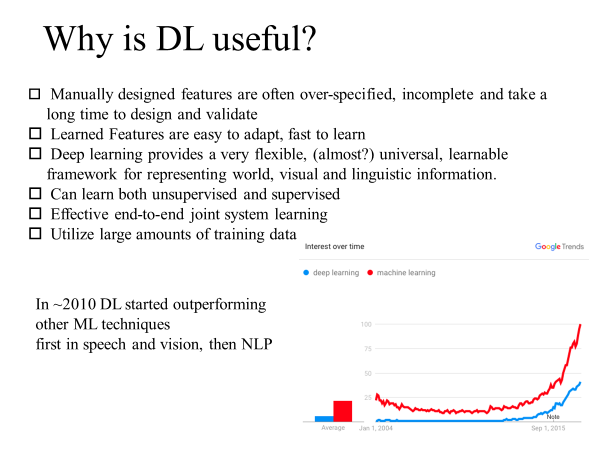

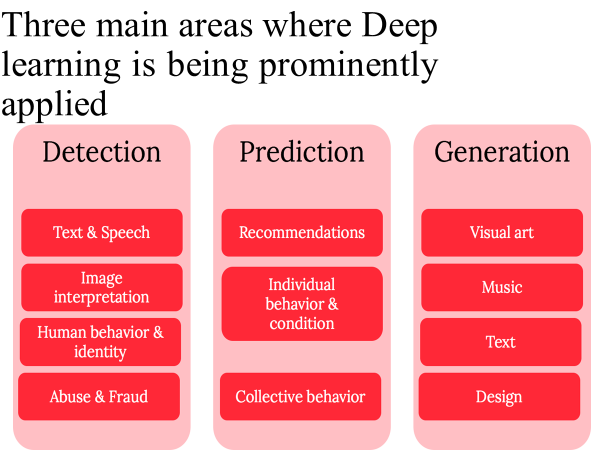

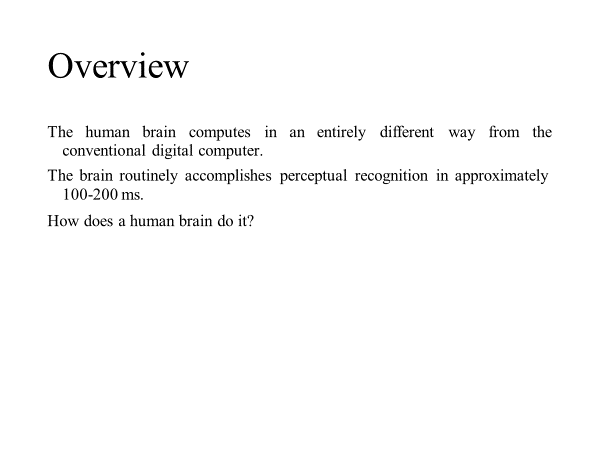

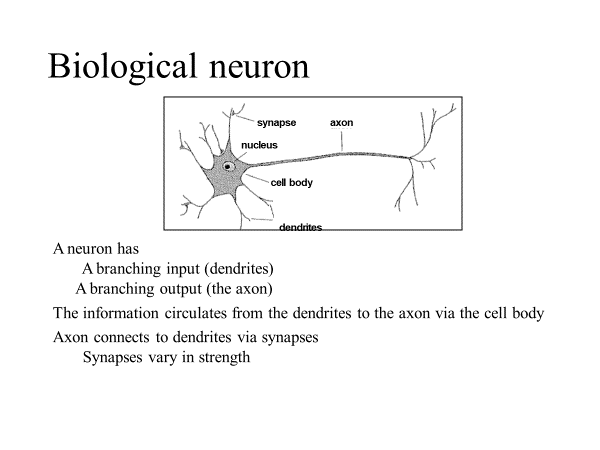

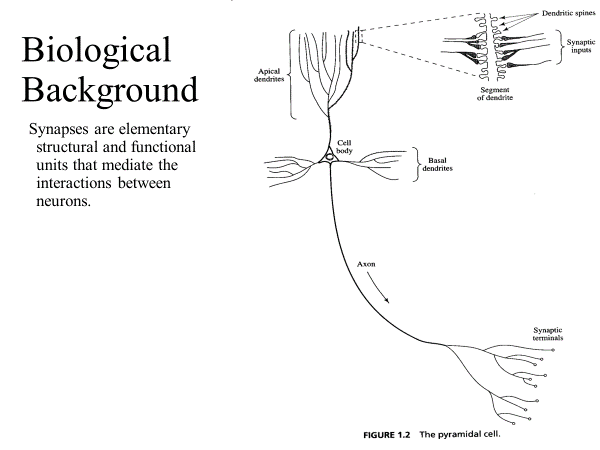

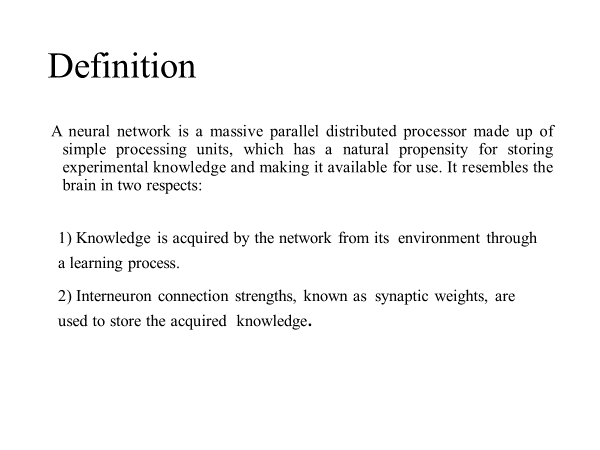

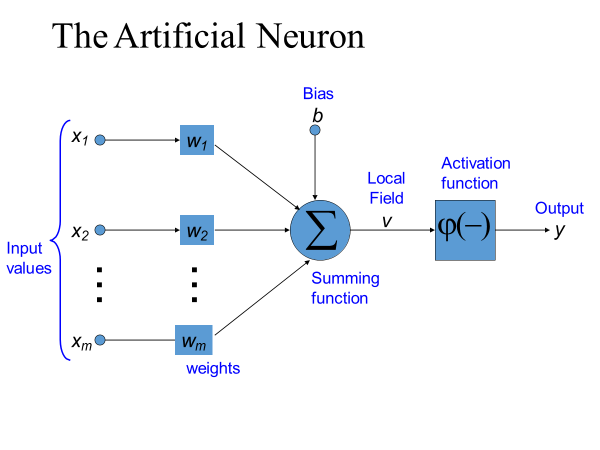

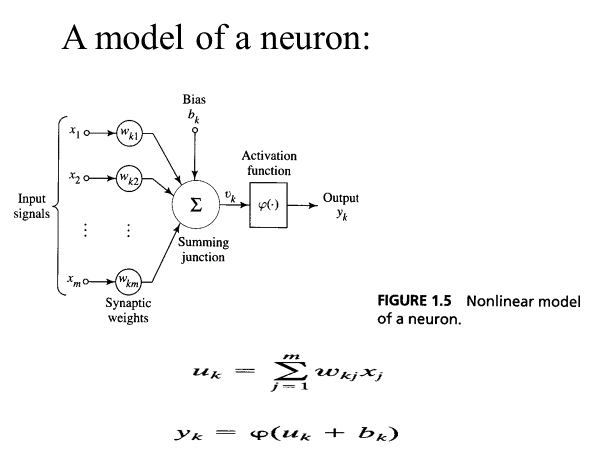

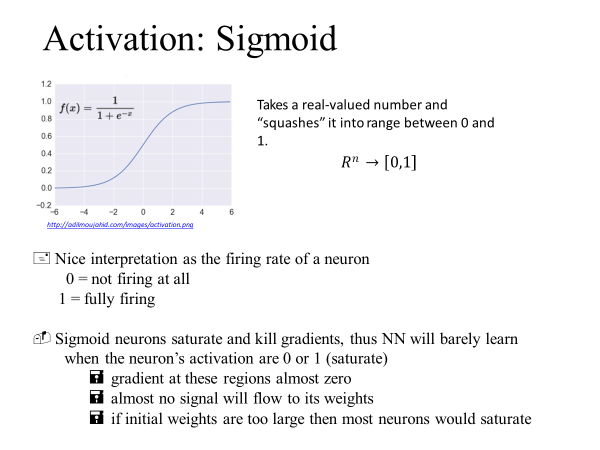

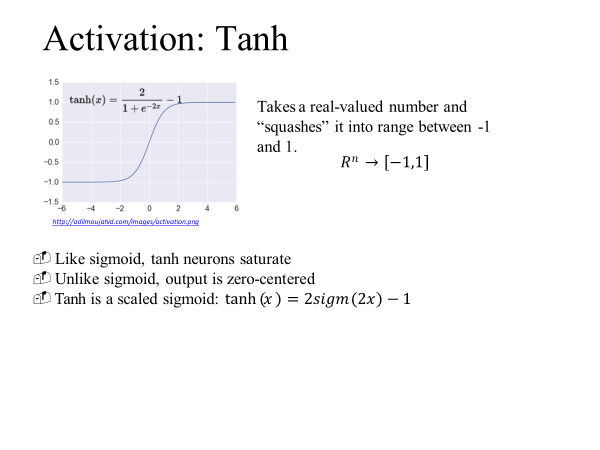

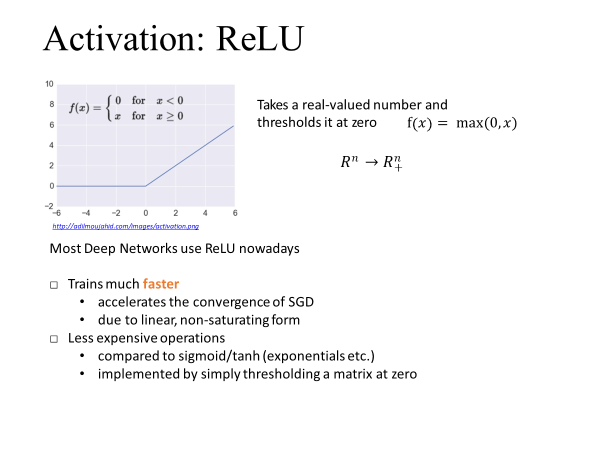

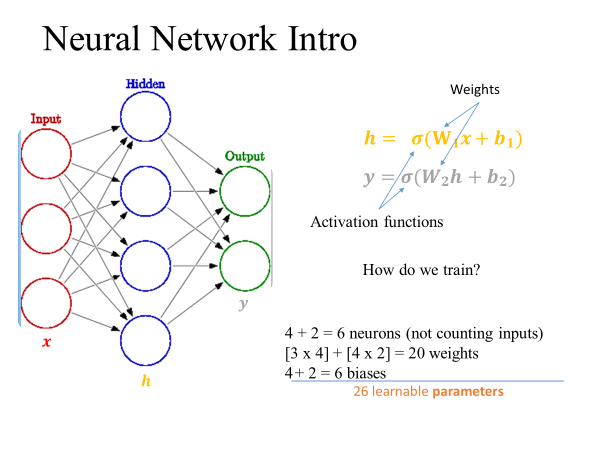

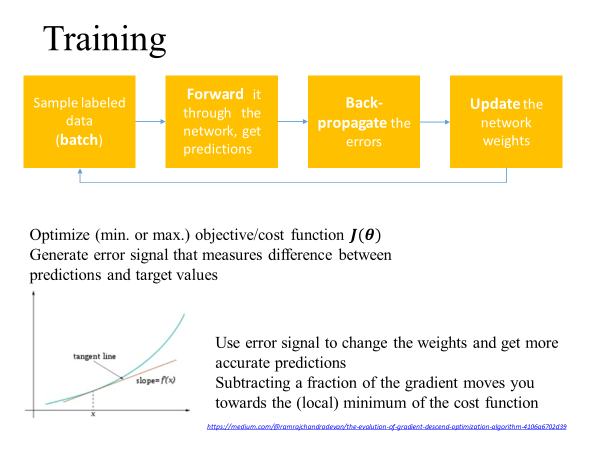

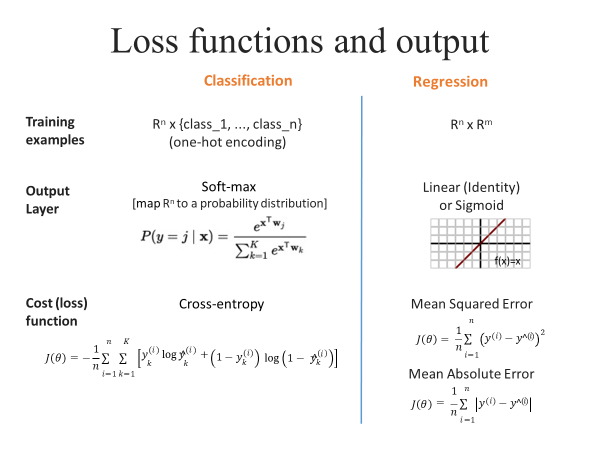

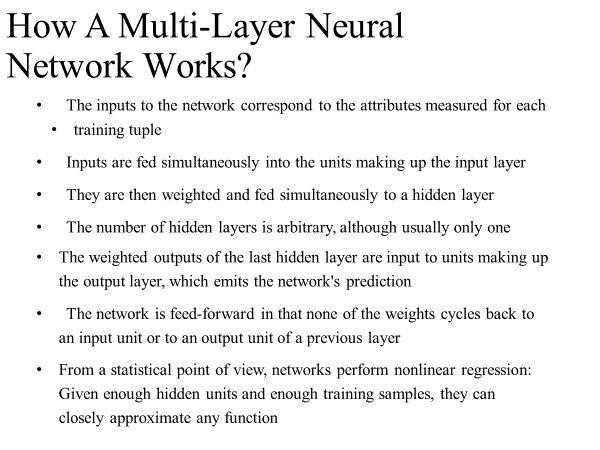

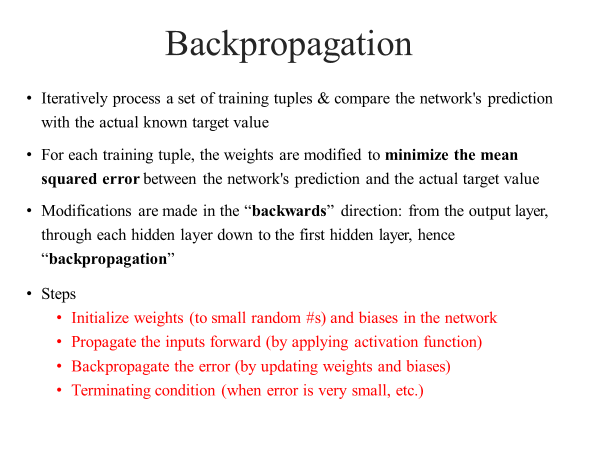

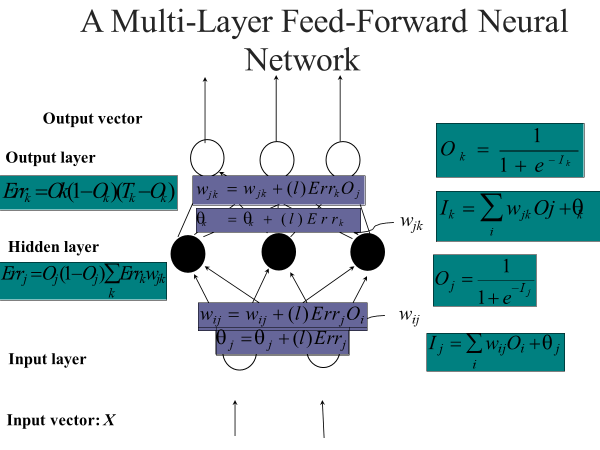

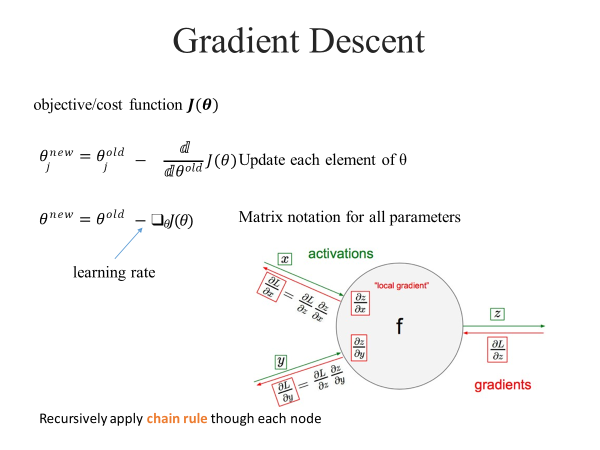

In [ ]:
# Data Preprocessing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
from google.colab import files
uploaded = files.upload()
input=list(uploaded.keys())
input=input[0]

IndexError: ignored

In [ ]:
data="https://raw.githubusercontent.com/deepakmoud/datasets-for-experiment/main/diabetes.csv"

In [ ]:
# Importing the dataset
dataset = pd.read_csv(data)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Mounting Google Drive
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(768, 9)


In [ ]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
#Print Information about date
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
types = dataset.dtypes
print(types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# Extracting dependent and independent variables:
# Extracting independent variable:
X = dataset.iloc[:,0:8].values
# Extracting dependent variable:
y = dataset.iloc[:, 8].values

In [ ]:
# Taking care of missing data
#handling missing data (Replacing missing data with the mean value)  
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.NAN, strategy= 'mean', fill_value=None, copy=True)
#Fitting imputer object to the independent variables x.   
imputer = imputer.fit(X[:, 2:7]) 
#Replacing missing data with the calculated mean value  
X[:, 2:7]= imputer.transform(X[:, 2:7])  

In [ ]:
print(X)

[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
print(y)

[1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1
 1 0 0 1 1 1 0 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 0 0 0 0 0
 1 1 1 1 1 0 0 1 1 0 1 0 1 1 1 0 0 0 0 0 0 1 1 0 1 0 0 0 1 1 1 1 0 1 1 1 1
 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 1 1 1 0 0
 1 0 1 0 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0 0 1
 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 0 0 1 0 0 1
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 1 0 1 1 0 1 0 1 0 1
 0 1 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 1 0 0 0 0 1 0 0 1
 1 1 0 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 

In [ ]:
# Encoding Categorical data:
# Encoding the Independent Variable
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()
X[:, 0] = labelencoder_X.fit_transform(X[:, 0])

In [ ]:
print(X)

In [ ]:
# Splitting the Dataset into the Training set and Test set

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
print(X_train)

[[  2.     84.      0.    ...   0.      0.304  21.   ]
 [  9.    112.     82.    ...  28.2     1.282  50.   ]
 [  1.    139.     46.    ...  28.7     0.654  22.   ]
 ...
 [ 10.    101.     86.    ...  45.6     1.136  38.   ]
 [  0.    141.      0.    ...  42.4     0.205  29.   ]
 [  0.    125.     96.    ...  22.5     0.262  21.   ]]


In [ ]:
print(y_train)

[0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 0 1 0 1
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 1 1 0 0 1
 1 0 0 0 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0
 0 0 0 0 1 1 1 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 1 0 1 0 0
 1 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 1 1
 1 1 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 0 1 1 0 1 1
 0 0 1 0 1 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 0 1 0 0 1 0 1 0 0 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 0
 0 0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 1 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 0 1 0 0 1 1 

In [ ]:
print(X_test)

[[  6.     98.     58.    ...  34.      0.43   43.   ]
 [  2.    112.     75.    ...  35.7     0.148  21.   ]
 [  2.    108.     64.    ...  30.8     0.158  21.   ]
 ...
 [  8.     95.     72.    ...  36.8     0.485  57.   ]
 [  2.    146.     70.    ...  28.      0.337  29.   ]
 [  8.     74.     70.    ...  35.3     0.705  39.   ]]


In [ ]:
print(y_test)

[0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1
 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 1 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 1 0 0 0 1
 0 0 0 0 0 0 1 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 0 1 1 1 0
 0 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 0
 0 1 0 0 1 0]


In [ ]:
# Feature Scaling
# Standard Scaling:  Standardization = X'=X-mean(X)/standard deviation
# normal scaling : Normalization= X'=X-min(X)/max(x)-min(X)

from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)
print(X_train)

[[-0.52639686 -1.15139792 -3.75268255 ... -4.13525578 -0.49073479
  -1.03594038]
 [ 1.58804586 -0.27664283  0.68034485 ... -0.48916881  2.41502991
   1.48710085]
 [-0.82846011  0.56687102 -1.2658623  ... -0.42452187  0.54916055
  -0.94893896]
 ...
 [ 1.8901091  -0.62029661  0.89659009 ...  1.76054443  1.981245
   0.44308379]
 [-1.13052335  0.62935353 -3.75268255 ...  1.34680407 -0.78487662
  -0.33992901]
 [-1.13052335  0.12949347  1.43720319 ... -1.22614383 -0.61552223
  -1.03594038]]


In [ ]:
print(X_test)

[[ 0.68185612 -0.71402038 -0.61712658 ...  0.26073561 -0.11637247
   0.87809089]
 [-0.52639686 -0.27664283  0.30191569 ...  0.48053518 -0.954231
  -1.03594038]
 [-0.52639686 -0.40160784 -0.29275872 ... -0.15300476 -0.9245197
  -1.03594038]
 ...
 [ 1.28598261 -0.80774414  0.13973176 ...  0.62275843  0.04703966
   2.0961108 ]
 [-0.52639686  0.78555979  0.03160914 ... -0.51502758 -0.39268751
  -0.33992901]
 [ 1.28598261 -1.46381046  0.03160914 ...  0.42881763  0.70068816
   0.53008521]]


In [ ]:
# Part 2 - Now let's make the ANN!

# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Initialising the ANN
model = Sequential()
print(model)

In [ ]:
# Adding the input layer and the first hidden layer
#model.add(Dense(output_dim=6, init = 'uniform', activation = 'relu', input_dim = 11))Verson Changed
model.add(Dense(units=4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))

# Adding the second hidden layer
model.add(Dense(units= 4, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
model.add(Dense(units= 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

In [ ]:
# Compiling the ANN
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
# Fitting the ANN to the Training set
from timeit import default_timer as timer
start = timer()


history=model.fit(X_train, y_train, batch_size = 8, epochs = 10, verbose=1)
end = timer() 
print("Time Elapsed in seconds",  (end - start))


Epoch 1/10
77/77 [==============================] - 6s 4ms/step - loss: 0.6892 - accuracy: 0.6547
Epoch 2/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6813 - accuracy: 0.6531
Epoch 3/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6701 - accuracy: 0.6808
Epoch 4/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6505 - accuracy: 0.7655
Epoch 5/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6303 - accuracy: 0.7655
Epoch 6/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6146 - accuracy: 0.7752
Epoch 7/10
77/77 [==============================] - 0s 4ms/step - loss: 0.6033 - accuracy: 0.7704
Epoch 8/10
77/77 [==============================] - 0s 4ms/step - loss: 0.5925 - accuracy: 0.7671
Epoch 9/10
77/77 [==============================] - 0s 4ms/step - loss: 0.5830 - accuracy: 0.7704
Epoch 10/10
77/77 [==============================] - 0s 4ms/step - loss: 0.5747 - accuracy: 0.7785
Time Elapsed in sec

dict_keys(['loss', 'accuracy'])


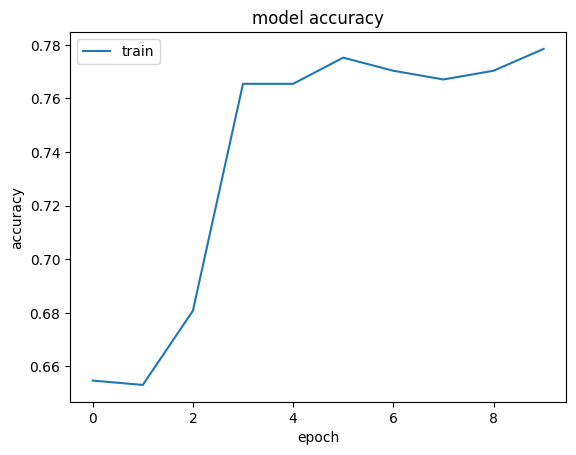

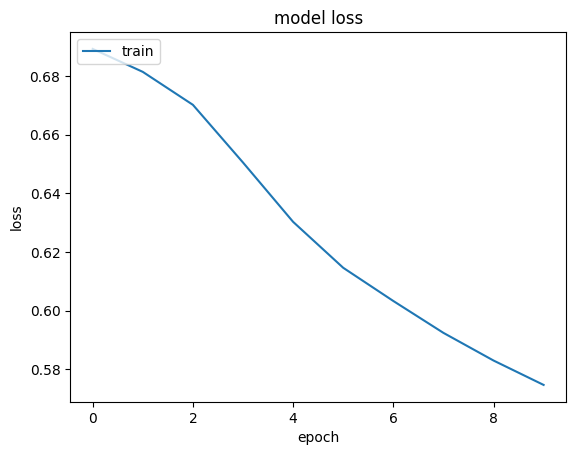

In [ ]:
import matplotlib.pyplot as plt
# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# save model and architecture to single file
model.save('/content/drive/My Drive/churnmodelANN.h5')
model.summary()

print("Saved model to disk")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________
Saved model to disk


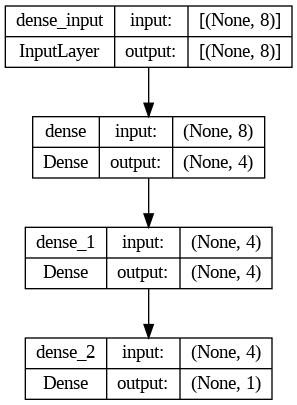

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model, to_file='model_plot_CNN.png', show_shapes=True, show_layer_names=True)

In [ ]:
# Loading saved model from Drive.
from keras.models import load_model
model = load_model('/content/drive/My Drive/churnmodelANN.h5')
print("Model is Loaded")
model.summary()

Model is Loaded
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 36        
                                                                 
 dense_1 (Dense)             (None, 4)                 20        
                                                                 
 dense_2 (Dense)             (None, 1)                 5         
                                                                 
Total params: 61
Trainable params: 61
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = model.predict(X_test)
y_pred


5/5 [==============================] - 0s 2ms/step


array([[0.37394166],
       [0.37394166],
       [0.37394166],
       [0.37394166],
       [0.48241866],
       [0.45410082],
       [0.37394166],
       [0.5807867 ],
       [0.57110375],
       [0.6531263 ],
       [0.37394166],
       [0.78514135],
       [0.47569287],
       [0.39519835],
       [0.37394166],
       [0.49171272],
       [0.37394166],
       [0.37394166],
       [0.76079524],
       [0.58363104],
       [0.37394166],
       [0.37394166],
       [0.4885841 ],
       [0.37394166],
       [0.5427746 ],
       [0.7958351 ],
       [0.37394166],
       [0.37394166],
       [0.37394166],
       [0.37394166],
       [0.83348525],
       [0.7377092 ],
       [0.7449995 ],
       [0.75152785],
       [0.5592242 ],
       [0.68432873],
       [0.8882149 ],
       [0.37394166],
       [0.47559735],
       [0.630127  ],
       [0.37394166],
       [0.54492426],
       [0.5150225 ],
       [0.39829963],
       [0.37394166],
       [0.60626435],
       [0.62116545],
       [0.373

In [ ]:
y_pred = (y_pred > 0.5)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion matrix: ')
print(cm)

Confusion matrix: 
[[79 20]
 [19 36]]


In [ ]:
# calculate Accuracy
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# Accuracy 64+29/64+4+3+29
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 74.68


In [ ]:
from sklearn.metrics import precision_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# precision= 29/29+4
precision = precision_score(y_test, y_pred, average='binary')
print('Precision: %.3f' % (precision*100))

Precision: 64.286


In [ ]:
# calculate recall
# Recall = TruePositives / (TruePositives + FalseNegatives)
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[3(FN)     29]  Type 2 Error
# precision= 29/29+3
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
recall = recall_score(y_test, y_pred, average='binary')
print('Recall: %.3f' % (recall*100))

Recall: 65.455


In [ ]:
# F-Measure = (2 * Precision * Recall) / (Precision + Recall)
# score= (2*87.879* 90.625)/87.879+ 90.625
# calculate score
score = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % (score*100))

F-Measure: 64.865


In [ ]:
# Tuning the ANN
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu', input_dim = 8))
    classifier.add(Dense(units = 4, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier
classifier = KerasClassifier(build_fn = build_classifier)
parameters = {'batch_size': [25, 32],
              'epochs': [10, 20],
              'optimizer': ['adam', 'rmsprop']
              }
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(X_train, y_train)
best_parameters = grid_search.best_params_
best_accuracy = grid_search.best_score_

Epoch 1/10


<ipython-input-38-d98e329ac0cc>:13: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  classifier = KerasClassifier(build_fn = build_classifier)


23/23 [==============================] - 2s 4ms/step - loss: 0.6917 - accuracy: 0.6449
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6884 - accuracy: 0.6522
Epoch 3/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6848 - accuracy: 0.6522
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.6522
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6725 - accuracy: 0.6522
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6624 - accuracy: 0.6522
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6481 - accuracy: 0.6522
Epoch 8/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6290 - accuracy: 0.6540
Epoch 9/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6069 - accuracy: 0.6775
Epoch 10/10
2/2 [==============================] - 0s 5ms/step
Epoch 1/10
23/23 [==============================] - 1s 4ms/step - 

2/2 [==============================] - 0s 7ms/step
Epoch 1/10
23/23 [==============================] - 2s 4ms/step - loss: 0.6917 - accuracy: 0.6456
Epoch 2/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6885 - accuracy: 0.6600
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6853 - accuracy: 0.6600
Epoch 4/10
23/23 [==============================] - 0s 3ms/step - loss: 0.6822 - accuracy: 0.6600
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6785 - accuracy: 0.6600
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6744 - accuracy: 0.6618
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6693 - accuracy: 0.6926
Epoch 8/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6626 - accuracy: 0.7360
Epoch 9/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6549 - accuracy: 0.7595
Epoch 10/10
23/23 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 6ms/step
Epoch 1/10
23/23 [==============================] - 1s 4ms/step - loss: 0.6918 - accuracy: 0.6582
Epoch 2/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6884 - accuracy: 0.6528
Epoch 3/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6842 - accuracy: 0.6528
Epoch 4/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6787 - accuracy: 0.6528
Epoch 5/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6700 - accuracy: 0.6528
Epoch 6/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6583 - accuracy: 0.6528
Epoch 7/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6427 - accuracy: 0.6564
Epoch 8/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6227 - accuracy: 0.6872
Epoch 9/10
23/23 [==============================] - 0s 4ms/step - loss: 0.6000 - accuracy: 0.7396
Epoch 10/10
2/2 [==============================] - 0s 6ms/step
Epoc

In [ ]:
print("Best Parameters", best_parameters)
print("Best Accuracy", best_accuracy)

Best Parameters {'batch_size': 25, 'epochs': 20, 'optimizer': 'adam'}
Best Accuracy 0.7260973030142782


# Neural Architecture search

Neural Architecture Search aims at discovering the best architecture for a neural network for a specific need. NAS essentially takes the process of a human manually tweaking a neural network and learning what works well, and automates this task to discover more complex architectures. This domain represents a set of tools and methods that will test and evaluate a large number of architectures across a search space using a search strategy and select the one that best meets the objectives of a given problem by maximizing a fitness function.



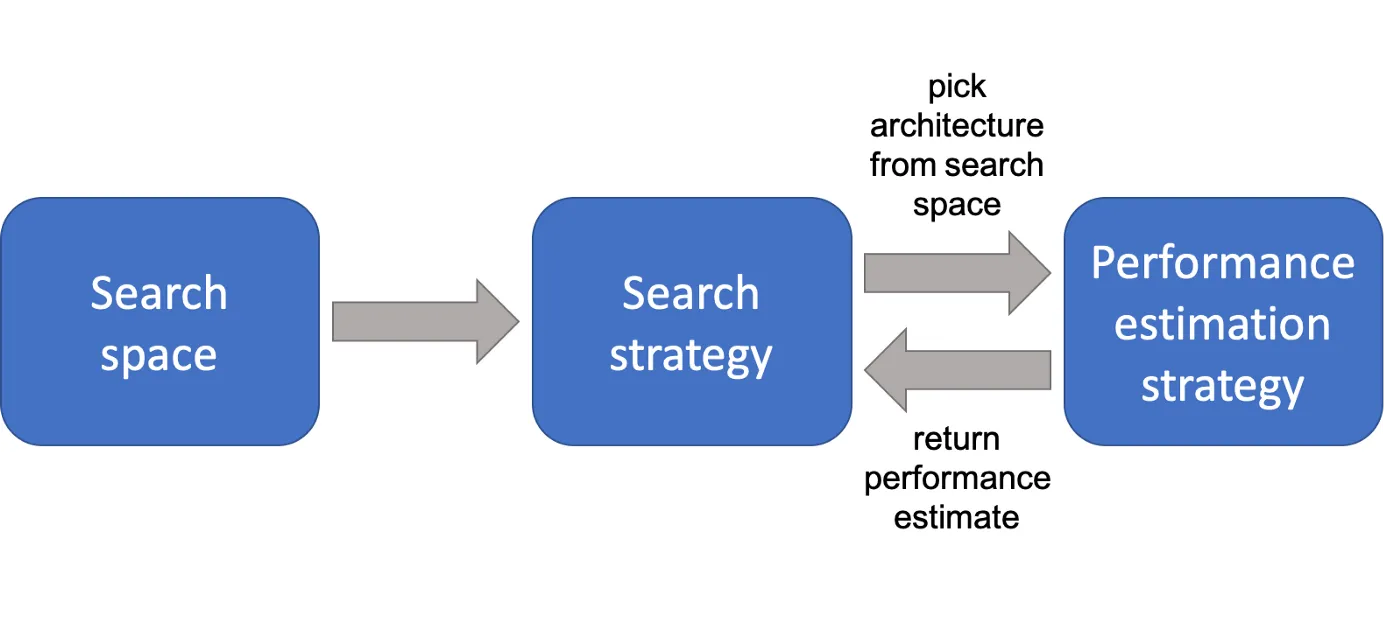

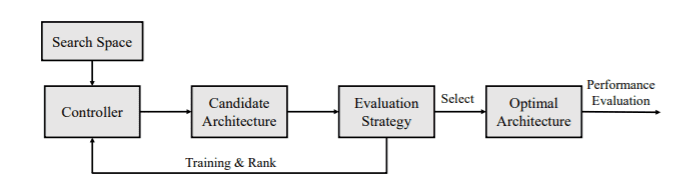

We can classify NAS algorithms by their search strategy into 5 main areas:

1. Random search

2. Reinforcement learning

3. Evolutionary algorithms

4. Sequential model-based optimization

5. Gradient optimization



In [ ]:
!pip install keras-tuner --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 176.1/176.1 kB 7.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras_tuner import HyperModel, RandomSearch
from keras_tuner.engine.hyperparameters import Choice


In [ ]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
class MyHyperModel(HyperModel):
    def build(self, hp):
        model = Sequential()
        
        # Define the layer choice
        layer_choice = hp.Choice('layer_choice', values=['dense', 'conv2d'])
        
        if layer_choice == 'dense':
            dense_units = hp.Choice('dense_units', values=[64, 128, 256])
            model.add(Flatten(input_shape=(28, 28, 1)))
            model.add(Dense(dense_units, activation='relu'))
        elif layer_choice == 'conv2d':
            conv2d_filters = hp.Choice('conv2d_filters', values=[32, 64, 128])
            conv2d_kernel_size = hp.Choice('conv2d_kernel_size', values=[3, 5, 7])
            model.add(Conv2D(conv2d_filters, conv2d_kernel_size, activation='relu', input_shape=(28, 28, 1)))
            model.add(Flatten(input_shape=(28, 28, 1)))
        model.add(Dense(10, activation='softmax'))
        
        # Compile the model
        model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
        
        return model

In [ ]:
# Load the MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Preprocess the data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
# Define the HyperModel instance
hypermodel = MyHyperModel()



In [ ]:
# Define the search space for Keras Tuner
tuner = RandomSearch(
    hypermodel,
    objective='val_accuracy',
    max_trials=10,
    directory='my_dir',
    project_name='my_project'
)



In [ ]:
tuner.search_space_summary()

Search space summary
Default search space size: 2
layer_choice (Choice)
{'default': 'dense', 'conditions': [], 'values': ['dense', 'conv2d'], 'ordered': False}
dense_units (Choice)
{'default': 64, 'conditions': [], 'values': [64, 128, 256], 'ordered': True}


In [ ]:
# Perform NAS with Keras Tuner
tuner.search(X_train, y_train, validation_data=(X_val, y_val), epochs=5, batch_size=64)



Trial 10 Complete [00h 00m 21s]
val_accuracy: 0.984416663646698

Best val_accuracy So Far: 0.9861666560173035
Total elapsed time: 00h 03m 30s


In [ ]:
tuner.results_summary()

Results summary
Results in my_dir/my_project
Showing 10 best trials
Objective(name="val_accuracy", direction="max")

Trial 05 summary
Hyperparameters:
layer_choice: conv2d
dense_units: 128
conv2d_filters: 64
conv2d_kernel_size: 7
Score: 0.9861666560173035

Trial 04 summary
Hyperparameters:
layer_choice: conv2d
dense_units: 64
conv2d_filters: 128
conv2d_kernel_size: 5
Score: 0.9849166870117188

Trial 09 summary
Hyperparameters:
layer_choice: conv2d
dense_units: 256
conv2d_filters: 32
conv2d_kernel_size: 7
Score: 0.984416663646698

Trial 07 summary
Hyperparameters:
layer_choice: conv2d
dense_units: 64
conv2d_filters: 128
conv2d_kernel_size: 3
Score: 0.981083333492279

Trial 01 summary
Hyperparameters:
layer_choice: conv2d
dense_units: 256
conv2d_filters: 32
conv2d_kernel_size: 3
Score: 0.9796666502952576

Trial 06 summary
Hyperparameters:
layer_choice: conv2d
dense_units: 128
conv2d_filters: 32
conv2d_kernel_size: 3
Score: 0.9795833230018616

Trial 08 summary
Hyperparameters:
layer_choic

In [ ]:
best_hyperparameter = tuner.get_best_hyperparameters(1)[0]
print(best_hyperparameter.values)

{'layer_choice': 'conv2d', 'dense_units': 128, 'conv2d_filters': 64, 'conv2d_kernel_size': 7}


In [ ]:
# Get the best model architecture
best_model = tuner.get_best_models(num_models=1)[0]



In [ ]:
print(best_model)

In [ ]:
# Evaluate the best model on the test set
_, accuracy = best_model.evaluate(X_test, y_test)



313/313 [==============================] - 1s 3ms/step - loss: 0.0465 - accuracy: 0.9859


In [ ]:


# Print the best model's accuracy
print("Best model accuracy:", accuracy)

Best model accuracy: 0.9858999848365784


# PCA

In [ ]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [ ]:
!pip install -U scikit-learn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
data="https://raw.githubusercontent.com/deepakmoud/datasets-for-experiment/main/diabetes.csv"

In [ ]:
# Importing the dataset
dataset = pd.read_csv(data)
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Print Total number of Rows & columns in dataset
print(dataset.shape)

(768, 9)


In [ ]:
#Print Information about data
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
types = dataset.dtypes
print(types)

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


In [ ]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# Extracting features of dataset

X = dataset.iloc[:, 0:8].values
y = dataset.iloc[:,8].values



In [ ]:
print(X)


[[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]


In [ ]:
X.shape

(768, 8)

In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
print(X_train)

[[7.00e+00 1.50e+02 7.80e+01 ... 3.52e+01 6.92e-01 5.40e+01]
 [4.00e+00 9.70e+01 6.00e+01 ... 2.82e+01 4.43e-01 2.20e+01]
 [0.00e+00 1.65e+02 9.00e+01 ... 5.23e+01 4.27e-01 2.30e+01]
 ...
 [4.00e+00 9.40e+01 6.50e+01 ... 2.47e+01 1.48e-01 2.10e+01]
 [1.10e+01 8.50e+01 7.40e+01 ... 3.01e+01 3.00e-01 3.50e+01]
 [5.00e+00 1.36e+02 8.20e+01 ... 0.00e+00 6.40e-01 6.90e+01]]


In [ ]:
y_train

array([1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
X_test

array([[1.000e+00, 1.990e+02, 7.600e+01, ..., 4.290e+01, 1.394e+00,
        2.200e+01],
       [2.000e+00, 1.070e+02, 7.400e+01, ..., 3.360e+01, 4.040e-01,
        2.300e+01],
       [4.000e+00, 7.600e+01, 6.200e+01, ..., 3.400e+01, 3.910e-01,
        2.500e+01],
       ...,
       [4.000e+00, 1.420e+02, 8.600e+01, ..., 4.400e+01, 6.450e-01,
        2.200e+01],
       [3.000e+00, 1.160e+02, 7.400e+01, ..., 2.630e+01, 1.070e-01,
        2.400e+01],
       [1.000e+00, 1.070e+02, 7.200e+01, ..., 3.080e+01, 8.210e-01,
        2.400e+01]])

In [ ]:
y_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0])

PCA

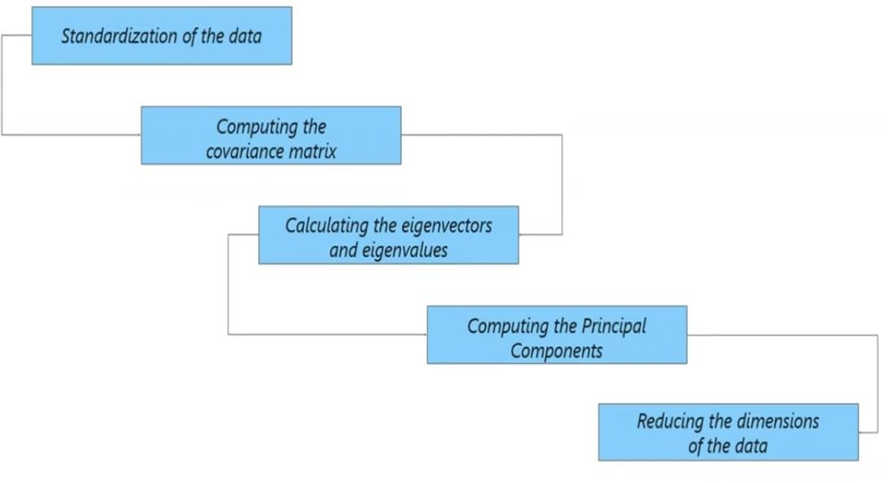

Step1: Standarization

In [ ]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [ ]:
X_train

array([[ 0.90832902,  0.91569367,  0.44912368, ...,  0.37852648,
         0.67740401,  1.69955804],
       [ 0.03644676, -0.75182191, -0.47230103, ..., -0.50667229,
        -0.07049698, -0.96569189],
       [-1.12606292,  1.38763205,  1.06340683, ...,  2.54094063,
        -0.11855487, -0.88240283],
       ...,
       [ 0.03644676, -0.84620959, -0.21634972, ..., -0.94927168,
        -0.95656442, -1.04898095],
       [ 2.0708387 , -1.12937261,  0.24436264, ..., -0.26640405,
        -0.50001442,  0.11706589],
       [ 0.32707418,  0.47521786,  0.65388473, ..., -4.07275877,
         0.52121586,  2.94889395]])

In [ ]:
X_test

array([[-0.8354355 ,  2.45735903,  0.34674316, ...,  1.35224513,
         2.78594417, -0.96569189],
       [-0.54480808, -0.43719633,  0.24436264, ...,  0.17619533,
        -0.1876381 , -0.88240283],
       [ 0.03644676, -1.41253563, -0.36992051, ...,  0.22677812,
        -0.22668514, -0.71582471],
       ...,
       [ 0.03644676,  0.66399321,  0.85864578, ...,  1.4913478 ,
         0.53623395, -0.96569189],
       [-0.25418066, -0.15403331,  0.24436264, ..., -0.74694053,
        -1.07971278, -0.79911377],
       [-0.8354355 , -0.43719633,  0.14198211, ..., -0.17788417,
         1.06487079, -0.79911377]])

In [ ]:
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

Step 2 Finding Coviariance matrix. 

step 3: Find out Eigen values and eigen vectors. 

Step4: Find PCs

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = None)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_


In [ ]:
explained_variance

array([0.2595475 , 0.22020622, 0.12734819, 0.11057783, 0.09403196,
       0.08720167, 0.0510702 , 0.05001642])

In [ ]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components = 3)
X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.2595475 , 0.22020622, 0.12734819])

In [ ]:
print(X_train)

[[ 1.55903001  1.61914081  0.41777967]
 [-1.06486934 -0.73790078 -0.33607421]
 [ 4.49192558 -2.07048749  0.90191999]
 ...
 [-1.51010987 -0.62311527 -0.68437341]
 [-1.36750774  1.67116765 -0.80426357]
 [-1.86191417  3.0680674   1.73287469]]


In [ ]:
print(X_test)

[[ 2.6374647  -1.10056873  0.88005174]
 [ 0.13961701 -1.13075325 -0.60524893]
 [-1.62717184 -0.32552874 -0.6431016 ]
 [ 0.82688588  1.3747876   1.44209481]
 [-1.49633607 -0.40507918  0.59735376]
 [-1.31121931 -1.04801692 -0.75836319]
 [ 1.83813547  0.63913398  0.60967741]
 [ 2.24793844  0.96707669  1.34064209]
 [ 1.2880887  -1.5443965   2.38942671]
 [ 1.04361107  1.01633999 -0.44692377]
 [ 1.85214248 -0.76530964  1.08249116]
 [ 2.95172316  1.19769999  1.35504129]
 [-0.84109507  1.93752404  0.57687215]
 [ 0.10574877 -1.66980718  1.46441031]
 [-0.59156189  0.83824783 -1.06697266]
 [-0.61770534 -0.76371161  0.18856876]
 [ 1.90759848  0.7465946   0.83718955]
 [-2.4521227  -1.25593307 -0.16741845]
 [ 0.43703614  1.85740601 -0.4033445 ]
 [-0.19211282 -0.4861112  -0.09221287]
 [ 1.00230048  0.36611514 -0.61275515]
 [-0.10969772 -0.54240552 -0.57671893]
 [-1.92560969 -1.75992834  1.5864103 ]
 [-0.54381743  0.26695381 -1.88500051]
 [-0.97654138 -1.24970544  0.38141899]
 [-0.04369877 -1.35863513

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0,probability=True)
classifier.fit(X_train, y_train)


SVC(kernel='sigmoid', probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[84 23]
 [30 17]]


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 65.58


In [ ]:
# Applying Kernel PCA
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 2, kernel = 'rbf')
X_train = kpca.fit_transform(X_train)
X_test = kpca.transform(X_test)

In [ ]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'sigmoid', random_state = 0,probability=True)
classifier.fit(X_train, y_train)


SVC(kernel='sigmoid', probability=True, random_state=0)

In [ ]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)

In [ ]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print(cm)

[[84 23]
 [33 14]]


In [ ]:
from sklearn.metrics import accuracy_score
print('Accuracy: %.2f' % (accuracy_score(y_test, y_pred)*100))

Accuracy: 63.64


In [ ]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
# calculate precision
# Precision = TruePositives / (TruePositives + FalsePositives)
#               Y_pred
#             0       1
#          0[64     4(FP)]  Type 1 Error
# y-test   1[4(FN)     28]  Type 2 Error
precision = precision_score(y_test, y_pred, average='micro')
print('Precision: %.3f' % (precision*100))

Precision: 63.636


In [ ]:
import pickle 
print("[INFO] Saving model...")
# Save the trained model as a pickle string. 
saved_model=pickle.dump(classifier,open('/content/drive/My Drive/pca.pkl', 'wb')) 
# Saving model to disk

[INFO] Saving model...


In [ ]:
# Load the pickled model 
model = pickle.load(open('/content/drive/My Drive/svmmodel.pkl', 'rb'))  
# Use the loaded pickled model to make predictions 
model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator SVC from version 1.2.0 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Alcohol                 
Malic_Acid              
Ash                     
Ash_Alcanity            
Magnesium                 
Total_Phenols           
Flavanoids              
Nonflavanoid_Phenols    
Proanthocyanins         
Color_Intensity         
Hue                     
OD280                   
Proline                   

image.png

In [ ]:
Alcohol= 4 #@param {type:"number"}
Malic_Acid = 1.71 #@param {type:"number"}
Ash = 2.43 #@param {type:"number"}
Ash_Alcanity = 15.6 #@param {type:"number"}
Magnesium = 127 #@param {type:"number"}
Total_Phenols = 2.8 #@param {type:"number"}
Flavanoids = 3.06 #@param {type:"number"}
Nonflavanoid_Phenols = 0.28 #@param {type:"number"}
Proanthocyanins = 2.29 #@param {type:"number"}
Color_Intensity = 5.64 #@param {type:"number"}
Hue =  1.04#@param {type:"number"}
OD280 = 3.92 #@param {type:"number"}
Proline = 1065 #@param {type:"number"}

In [ ]:

X1=[Alcohol,              
Malic_Acid,              
Ash,                     
Ash_Alcanity,            
Magnesium,                 
Total_Phenols,           
Flavanoids,              
Nonflavanoid_Phenols,    
Proanthocyanins,         
Color_Intensity,         
Hue,                     
OD280,                   
Proline],[5,              
2.71,              
2.43,                     
18,            
130,                 
3.5,           
4,              
0.30,    
2.50,         
6,         
3,                     
4,                   
1080]
X1

([4, 1.71, 2.43, 15.6, 127, 2.8, 3.06, 0.28, 2.29, 5.64, 1.04, 3.92, 1065],
 [5, 2.71, 2.43, 18, 130, 3.5, 4, 0.3, 2.5, 6, 3, 4, 1080])

In [ ]:
X1 = sc.fit_transform(X1)

print(X1)

[[-1. -1.  0. -1. -1. -1. -1. -1. -1. -1. -1. -1. -1.]
 [ 1.  1.  0.  1.  1.  1.  1.  1.  1.  1.  1.  1.  1.]]


In [ ]:

X1 = kpca.fit_transform(X1)
print(X1)





[[ 0.69824264  0.        ]
 [-0.69824264  0.        ]]


In [ ]:
output=model.predict([[0, -1.02850086e+00]])
print("class =", output)
if output==[0]:
  print( 'Class 0')
elif output==[1]:
  print("Class 1")
else:
  print('Class 2')


class = [0]
Class 0


https://theaisummer.com/neural-architecture-search/